# **Predicción de Covid-19** 


---


## A partir de datos de  estadísticos  con  regresión lineal y ajuste polinomial utilizando Machine Learning en Ecuador y la Provincia de Santo Domingo de los Tsachilas 

### Los datos  estadísticos  obtenidos son tomados  directamente de los repositorios  de   Robalino Andrés de Git Hub([andrab](https://github.com/andrab/ecuacovid)) y del Observatorio Social Del Ecuador([link](https://www.covid19ecuador.org/provincias))

---







## **Importar librerias**

In [ ]:
!pip install -U scikit-learn
import pandas as pd
import numpy as np
import io
import random  as  rd 
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

     |████████████████████████████████| 22.2MB 41.5MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


## **Cargar Datos **

### Cargaremos  los correspondientes archivos csv de las  páginas  


1.   Datos  de casos en la Provicia de Santo Domingo (Observatorio Social Del Ecuador)
2.   Datos de casos en Ecuado(Robalino Andrés) 



In [ ]:
Dat = '/content/drive/MyDrive/Recursos/SantoDomingo.csv'

DatSd= pd.read_csv(Dat , delimiter= ';')

Pais = pd.read_csv('/content/drive/MyDrive/Recursos/datos_Pais.csv')


In [ ]:
print(DatSd)


     Año_de_Fecha  ... Sum_casos_acumulados
0            2020  ...                  NaN
1            2020  ...                  1.0
2            2020  ...                  NaN
3            2020  ...                  1.0
4            2020  ...                  NaN
..            ...  ...                  ...
611          2021  ...               6357.0
612          2021  ...                  NaN
613          2021  ...               6416.0
614          2021  ...                  NaN
615          2021  ...               6429.0

[616 rows x 6 columns]


In [ ]:
print(Pais)

       informacion  13/03/2020  14/03/2020  ...  28/01/2021  29/01/2021  30/01/2021
0  Total Positivas          23          28  ...      254956      255643      258735
1              PCR          23          28  ...      246000      246687      249779
2           Nuevas           0           5  ...        2465         687        3092
3          Rápidas           0           0  ...        8956        8956        8956

[4 rows x 325 columns]


### Para la  primera tabla arreglaremos  la tabla de  datos adquirida para  poder  tener los datos de una manera mejor organizada añadiendo el número de días, fecha y el número de casos y crearemos  otro Archivo csv ya  arrglado para su posterior manipulación estos archivos estarán en  mi Repositorio de  Git Hub



In [ ]:
año, dia, mes, casos =[],[],[],[]
for i in range(len(DatSd['Año_de_Fecha'])):
  if i%2 ==0 :
    año.append(DatSd['Año_de_Fecha'][i])
    dia.append(DatSd['Día_Fecha'][i])
    mes.append(DatSd['Mes_Fecha'][i])
    casos.append((DatSd['Máx_casos_acumulados'][i]))

etiquetas = []
for  i in range(len(casos)):
  etiquetas.append(str(dia[i]) + ' de '+ str(mes[i]) + ' del ' + str(año[i]))

dias = list(range(1,len(mes)+1))
Dias =pd.DataFrame({'Dias':dias})
Tabla1 = pd.DataFrame({'Fechas':etiquetas})
Tabla2 = pd.DataFrame({'Numero de Casos':casos})
Tabla_Entera = pd.concat([Dias,Tabla1,Tabla2], axis= 1)
Tabla_Entera.to_csv(r'/content/drive/MyDrive/Recursos/DatosSAntoDomingo.csv', index= False)

DatosSd = pd.read_csv('/content/drive/MyDrive/Recursos/DatosSAntoDomingo.csv')
print(DatosSd)

     Dias                Fechas  Numero de Casos
0       1  19 de marzo del 2020                1
1       2  20 de marzo del 2020                1
2       3  21 de marzo del 2020                4
3       4  22 de marzo del 2020                4
4       5  23 de marzo del 2020                7
..    ...                   ...              ...
303   304  17 de enero del 2021             6352
304   305  18 de enero del 2021             6352
305   306  19 de enero del 2021             6357
306   307  20 de enero del 2021             6416
307   308  21 de enero del 2021             6429

[308 rows x 3 columns]


### Para la segunda tabla que  corresponde al país  debemos transponer  sus  datos y agregar el número de  días transcurridos

In [ ]:
Pais.T.to_csv('/content/drive/MyDrive/Recursos/DatosPais.csv' , index=True, header=False)
Datos_Pais = pd.read_csv('/content/drive/MyDrive/Recursos/DatosPais.csv')
Dias=pd.DataFrame({'Dias':list(range(1,len(Datos_Pais.informacion )+1 ))})
Datos_Pais =pd.concat([Dias , Datos_Pais], axis= 1 )
print(Datos_Pais)

     Dias informacion  Total Positivas     PCR  Nuevas  Rápidas
0       1  13/03/2020               23      23       0        0
1       2  14/03/2020               28      28       5        0
2       3  15/03/2020               37      37       9        0
3       4  16/03/2020               58      58      21        0
4       5  17/03/2020              111     111      53        0
..    ...         ...              ...     ...     ...      ...
319   320  26/01/2021           251102  242146     579     8956
320   321  27/01/2021           252491  243535    1389     8956
321   322  28/01/2021           254956  246000    2465     8956
322   323  29/01/2021           255643  246687     687     8956
323   324  30/01/2021           258735  249779    3092     8956

[324 rows x 6 columns]


## Gráfica Provincia de SD 

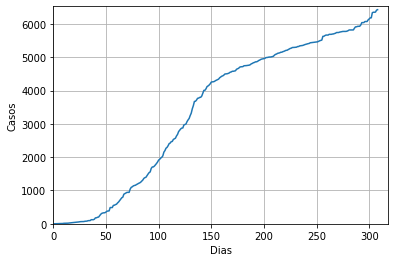

In [ ]:
#print(DatosSd)
Xs=np.array(DatosSd['Dias'])
Ys=np.array(DatosSd['Numero de Casos'])
Labels = np.array(DatosSd.Fechas)
plt.plot(Xs,Ys)
plt.grid()
plt.xlabel("Dias")
plt.ylabel("Casos")
plt.xlim(0,len(Xs)+10)
plt.ylim(0,Ys[-1]+100)
#plt.xticks(Xs ,Labels ,rotation = 90 )
plt.show()

##Gráfica Casos Ecuador

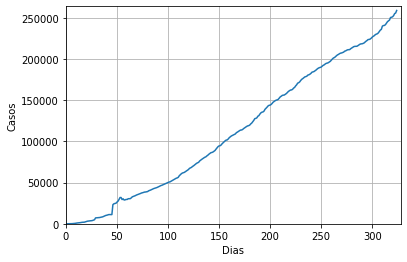

In [ ]:
#print(Datos_Pais)
Xe=np.array(Datos_Pais['Dias'])
Ye=np.array(Datos_Pais['Total Positivas'])
Labelse = np.array(Datos_Pais.informacion)
plt.plot(Xe,Ye)
plt.grid()
plt.xlabel("Dias")
plt.ylabel("Casos")
plt.xlim(0,len(Xs)+20)
plt.ylim(0,Ye[-1]+5000)
#plt.xticks(Xe ,Labelse ,rotation = 90 )
plt.show()

#**Regresión y predicción**

##**Regresión**


 Seleccion de Data set de Ecuador o Santo Domingo 
 escoja:
 Santo Domingo = 1 
 Ecuador = 2
introduzca eleccion :  2
ingrese el  numero de dias  apartir del 30 de enero 2021: 5
 su prediccion es :
[254666.2024429]


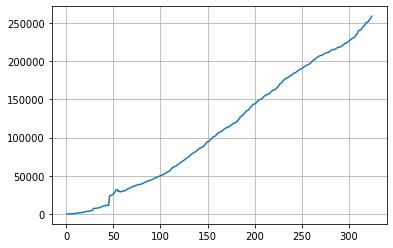

In [ ]:
print(" Seleccion de Data set de Ecuador o Santo Domingo \n escoja:\n Santo Domingo = 1 \n Ecuador = 2")
while True:
  sel = int(input('introduzca eleccion :  '))
  if sel==1 or sel ==2:
    break

if sel == 1:
  x =  np.array(DatosSd['Dias']) 
  y  = np.array(DatosSd['Numero de Casos'])
  n =int(input('ingrese el  numero de dias  apartir del 22 de enero 2021: '))
elif sel == 2:
  x =  np.array(Datos_Pais['Dias']) 
  y  = np.array(Datos_Pais['Total Positivas'])
  n =int(input('ingrese el  numero de dias  apartir del 30 de enero 2021: '))


x = mean_data = np.array(x)
X = x[:,np.newaxis]

while True:

  X_train , X_test, Y_train, Y_test = train_test_split(X,y , test_size=0.15)
  mlr = MLPRegressor(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(3,3), random_state=1)
  mlr.fit(X_train,Y_train)
  if mlr.score(X_train, Y_train) > 0.92:

    break 
print(" su prediccion es :")
print(mlr.predict(np.array(x[-1] + n ).reshape(1, 1)))
plt.plot(x,y) 
plt.grid()
plt.show()


## **Predicción**

 Seleccion de Data set de Ecuador o Santo Domingo 
 escoja:
 Santo Domingo = 1 
 Ecuador = 2
introduzca eleccion :  2
Predicción Ecuador 
Accuracy : 99.892 %
ingrese el  número de días a partir de 30 de enero 2021: 5
Predicción de casos después 5 días: 262623.0 personas


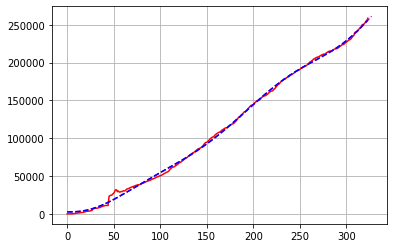

In [ ]:
print(" Seleccion de Data set de Ecuador o Santo Domingo \n escoja:\n Santo Domingo = 1 \n Ecuador = 2")
while True:
  sel = int(input('introduzca eleccion :  '))
  if sel==1 or sel ==2:
    break


if sel == 1:
  Data = DatosSd
  Data = Data[['Dias', 'Numero de Casos']]
  x = np.array(Data['Dias']).reshape(-1,1)
  y = np.array(Data['Numero de Casos']).reshape(-1,1)
  print('Predicción Santo Domingo ')
elif sel == 2:
  Data_pais = Datos_Pais
  Data_pais = Data_pais[['Dias','Total Positivas']]
  x = np.array(Data_pais['Dias']).reshape(-1,1)
  y = np.array(Data_pais['Total Positivas']).reshape(-1,1)
  print('Predicción Ecuador ')

plt.plot(y,'-r')
#plt.show()
Pol = PolynomialFeatures(degree= 8) # tener en  cuenta el  overfitting 
X = Pol.fit_transform(x)
# entrenamiento  
Modelo = linear_model.LinearRegression()
Modelo.fit(X,y)
Accuracy = Modelo.score(X,y)
print(f'Accuracy : {round(Accuracy*100 ,3)} %')
Y = Modelo.predict(X)
### predccion ### 
if sel ==1:
  dias = input('ingrese el  número de días a partir de 22 de enero 2021: ')
elif sel == 2:
  dias = input('ingrese el  número de días a partir de 30 de enero 2021: ')
dias = int(dias)
print(f'Predicción de casos después {dias} días: ', end='' )
print(round(int(Modelo.predict(Pol.fit_transform([[int(x[-1]) + dias]] )))/1,2),'personas')

x1 = np.array(list(range(1,int(x[-1]) + dias))).reshape(-1, 1)
y1 = Modelo.predict(Pol.fit_transform(x1))
plt.plot(y1,'--m')
plt.grid()
plt.plot(Y, '--b')
plt.show()